In [ ]:
import matplotlib.pyplot as plt
from HydroSphere import HydroSphere

In [ ]:
# helper function to compute structure as a function of bulk density and equilibrium surface temperature
# assuming core density, water fraction, radius, and surface pressure
def compute_structure(
    rho_bulk, 
    Teq, 
    rho_core, 
    fwater, 
    R, 
    Psurf, 
    resolution=100, 
    M_thresh=0.01, 
    savefile=None
):
    
    rho_bulk *= 5514
    rho_core *= 5514
    R *= 6.678e6
    M = (4/3) * np.pi * R**3 * rho_bulk
    Mw = M * mf
    Rc = (M * (1 - mf) * 3 / (4 * np.pi * rho_core)) ** (1/3)
    
    res = np.array(HydroSphere(Psurf, Teq, Mw, Rc, rho_core))
    
    if savefile is not None:
        
        # columns are z, rho, alpha, Cp, dT_dz, phase, T, P, g
        np.savetxt(savefile, res.T)
    else:
        return res

In [ ]:
# trappist-1 G params

rhoc = 1.5 # core density in earth units
R = 0.92 # in earth units
Ps = 0.1 # MPa 
# temps b, c, d, e, f, g: 400, 341, 288, 251, 219, 198, 168 from Agol 2020
Teq = 251

rho, mf = 0.889, 0.01

%time res = compute_structure(rho, Teq, rhoc, mf, R, Ps, M_thresh=0.1, resolution=50)
z, rho, alpha, Cp, dT_dz, phase, T, P, g = res

In [ ]:
plt.plot(z, phase)
plt.figure()
plt.plot(z, T)

In [ ]:
D = np.linspace(0.5, 1.0, 20)
fw = np.linspace(0.001, 0.01, 20)
D, fw = np.meshgrid(D, fw)
coords = [(i, D, fw) for i, (D, fw) in enumerate(zip(D.flatten(), fw.flatten()))]
coords

In [ ]:
def f(c):
    i, D, T = c
    savefile = 'out{0}.dat'.format(i)
    compute_structure(D, T, rhoc, mf, R, Ps, savefile=savefile)

coords = [(i, D, T) for i, (D, T) in enumerate(zip(T, Dens))]

In [ ]:
D = np.linspace(0.5, 1.5, 5)
T = np.linspace(150, 250, 5)
D, T = np.meshgrid(D, T)
coords = [(i, D, T) for i, (D, T) in enumerate(zip(D.flatten(), T.flatten()))]

In [ ]:
D = np.linspace(0.5, 1.5, 5)
T = np.linspace(150, 250, 5)
D, T = np.meshgrid(D, T)
coords = [(i, D, T) for i, (D, T) in enumerate(zip(D.flatten(), T.flatten()))]

In [ ]:
np.savetxt('test.dat', coords)

In [ ]:
z, rho, alpha, Cp, dT_dz, phase, T, P, g = np.loadtxt('out0.dat').T
water_layer = z[np.where(phase == 2)]
water_depth = water_layer[-1] - water_layer[0]
in_contact = phase[-1] == 2

In [ ]:
import os
keys = np.array([t[3:-4] for t in os.listdir('output')], dtype=np.int64)
coords[keys[0]]

In [ ]:
files = os.listdir('output')
i, rho, T = np.loadtxt('test.dat').T
dx, dy = len(np.unique(rho)), len(np.unique(T))
depth = np.zeros_like(rho)
contact = np.zeros_like(rho)
for f in files:
    j = np.int64(f[3:-4])
    z, _, _, _, _, phase, _, _, _ = np.loadtxt('output/' + f).T
    water_layer = z[np.where(phase == 2)]
    if len(water_layer) > 0:
        water_depth = water_layer[-1] - water_layer[0]
    else:
        water_depth = 0
    in_contact = phase[-1] == 2
    depth[j] = water_depth
    contact[j] = in_contact
    
depth = depth.reshape(dx, dy)
contact = contact.reshape(dx, dy)

In [ ]:
D = np.linspace(0.5, 1.5, 50)
fw = np.linspace(0.001, 0.01, 50)

outdir = 't1f'
depth = np.loadtxt(outdir + '/depth.dat')
contact_phase = np.loadtxt(outdir + '/contact_phase.dat')
water_temp_min = np.loadtxt(outdir + '/water_temp_min.dat')
water_temp_max = np.loadtxt(outdir + '/water_temp_max.dat')
base_pressures = np.loadtxt(outdir + '/base_pressures.dat')

plt.figure(figsize=(12, 10))
plt.pcolormesh(fw, D, base_pressures.T, cmap=plt.cm.Blues)
plt.colorbar().set_label(label='pressure at core-hydrosphere interface (MPa)', size=15)

plt.contour(fw, D, contact_phase.T, [1, 2, 5, 6, 7], colors='k', linewidths=3)

#plt.annotate('ice-Ih', (0.0015, 0.7), fontsize=15)
#plt.annotate('liquid water', (0.0025, 0.9), fontsize=15)
#plt.annotate('ice-V', (0.0032, 1.1), fontsize=15)
#plt.annotate('ice-VI', (0.004, 1.3), fontsize=15)

#rho1, rho2 = 0.889 - 0.033, 0.889 + 0.03
#plt.axhspan(rho1, rho2, color='k', alpha=0.3)
#plt.axhline(rho1, linestyle='--', color='k')
#plt.axhline(rho2, linestyle='--', color='k')

plt.xlim(0.001, 0.01)
plt.ylim(0.5, 1.5)
plt.xlabel('water mass fraction', fontsize=15)
plt.ylabel('core density (Earth units)', fontsize=15)
plt.title('Trappist-1f', fontsize=25)

plt.savefig('/Users/tgordon/Desktop/t1f_core_interface.pdf')

In [ ]:
fig = plt.figure()
ax = plt.gca()
type(fig)
isinstance(fig, mpl.figure.Figure)

In [ ]:
import plotting
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
#ax = plt.gca()
file = 't1d/contact_phase.out'
x = np.linspace(0.001, 0.03, 50)
y = np.linspace(0.5, 1.5, 50)

plotting.plotphase(fig, file, x, y, xlabel='water mass fraction', ylabel=r'core density ($\rho_\oplus$)', name='Trappist-1d');

In [ ]:
names = ['Trappist-1d', 'Trappist-1e', 'Trappist-1f', 'Trappist-1g']
files = ['t1d/contact_phase.out', 't1e/contact_phase.out', 't1f/contact_phase.out', 't1g/contact_phase.out']
fig, axs = plt.subplots(2, 2, figsize=(12, 11), sharey=True, sharex=True)
#axs = axs.flatten()

plotting.plotphase_multiple(fig, axs, files, x, y, xlabel=None, ylabel=None, names=names)

In [ ]:
import matplotlib as mpl
import cmasher as cmr

outdirs = ['t1d', 't1e', 't1f', 't1g']
names = ['Trappist-1d', 'Trappist-1e', 'Trappist-1f', 'Trappist-1g']
cmap = cmr.get_sub_cmap('cmr.arctic_r', 0.0, 0.8)

fig, axs = plt.subplots(2, 2, figsize=(12, 11), sharey=True, sharex=True)
axs = axs.flatten()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

D = np.linspace(0.5, 1.5, 50)
fw = np.linspace(0.001, 0.03, 50)

for i, outdir in enumerate(outdirs):
    depth = np.loadtxt(outdir + '/depth.out')
    contact_phase = np.loadtxt(outdir + '/contact_phase.out')
    water_temp_min = np.loadtxt(outdir + '/water_temp_min.out')
    water_temp_max = np.loadtxt(outdir + '/water_temp_max.out')
    base_pressures = np.loadtxt(outdir + '/base_pressures.out')

    #bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    contact_phase[contact_phase > 4] = contact_phase[contact_phase > 4] - 1
    axs[i].pcolormesh(fw, D, contact_phase.T, cmap=cmap, vmin=0, vmax=6,rasterized=True)
    #axs[i].contour(fw, D, contact_phase.T, np.unique(contact_phase), colors='k', linewidths=5)
    #axs[i].set_title(names[i] + '\n', fontsize=20)
    #axs[i].set_xlabel('water mass fraction', fontsize=15)
    
axs[0].set_ylabel(r'density of rocky core ($\rho_\oplus$)', fontsize=15)
axs[2].set_ylabel(r'density of rocky core ($\rho_\oplus$)', fontsize=15)
axs[2].set_xlabel('water mass fraction', fontsize=15)
axs[3].set_xlabel('water mass fraction', fontsize=15)

[
    ax.annotate(
        name, 
        (0.6, 0.85), 
        xycoords='axes fraction', 
        fontsize=20, 
        bbox=dict(facecolor=cmap(1.0), alpha=1.0, edgecolor=None, pad=10.0)
    ) 
    for name, ax in zip(names, axs)
]


[
    ax.annotate(
        name, 
        (0.6, 0.85), 
        xycoords='axes fraction', 
        fontsize=20, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor=None, pad=10.0)
    ) 
    for name, ax in zip(names, axs)
]


[ax.grid() for ax in axs]
[ax.set_xlim(0.001 - np.mean(np.diff(fw))/2, 0.03) for ax in axs]
[ax.set_ylim(0.5, 1.5) for ax in axs]

fig.suptitle('Phase of water in contact with rocky core', fontsize=20)
fig.subplots_adjust(top=0.92)

cax = fig.add_axes([0.15, 0.03, 0.71, 0.03])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal')
cb.set_ticks([0, 1, 2, 3, 4, 5, 6])
cb.set_ticklabels(['liquid water', 'ice-Ih', 'ice-II', 'ice-III', 'ice-V', 'ice-VI', 'ice-VII'], fontsize=15)
cb.ax.tick_params(size=0)

plt.savefig('/Users/tgordon/Desktop/trappist_structures.pdf', bbox_inches = "tight")

In [ ]:
import matplotlib as mpl

planets = ['d', 'e', 'f', 'g']
names = ['Trappist-1d', 'Trappist-1e', 'Trappist-1f', 'Trappist-1g']
cmap = cmr.get_sub_cmap('cmr.arctic_r', 0.0, 0.8)

fig, axs = plt.subplots(2, 2, figsize=(12, 11), sharey=True, sharex=True)
axs = axs.flatten()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

D = np.linspace(0.5, 1.5, 50)

indices = ['5', '10', '15', '20', '25', '30']

for ind in indices:
    for i, planet in enumerate(planets):
        zprofile = np.loadtxt('zprofile' + ind + '_' + planet + '.out')

        bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

        axs[i].pcolormesh(np.linspace(0, 1, 100), D, zprofile, cmap=cmap, vmin=0, vmax=7,rasterized=True)
    
    axs[0].set_ylabel(r'density of rocky core ($\rho_\oplus$)', fontsize=15)
    axs[2].set_ylabel(r'density of rocky core ($\rho_\oplus$)', fontsize=15)
    axs[2].set_xlabel(r'depth within hydrosphere $(z/z_w)$', fontsize=15)
    axs[3].set_xlabel(r'depth within hydrosphere $(z/z_w)$', fontsize=15)


    [
        ax.annotate(
            name, 
            (0.1, 0.15), 
            xycoords='axes fraction', 
            fontsize=20, 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor=None, pad=10.0)
        ) 
        for name, ax in zip(names, axs)
    ]


    [ax.grid() for ax in axs]
    [ax.set_xlim(-0.01, 1.0) for ax in axs]
    [ax.set_ylim(0.5, 1.5) for ax in axs]

    fig.suptitle('hydrosphere structure', fontsize=20)
    fig.subplots_adjust(top=0.92)

    cax = fig.add_axes([0.15, 0.03, 0.71, 0.03])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal')
    cb.set_ticks([0, 1, 2, 3, 4, 5, 6, 7])
    cb.set_ticklabels(['liquid water', 'ice-Ih', 'ice-II', 'ice-III', 'ice-IV', 'ice-V', 'ice-VI', 'ice-VII'], fontsize=15)
    cb.ax.tick_params(size=0)

    plt.savefig('/Users/tgordon/Desktop/trappist_profiles_' + ind + '.pdf', bbox_inches = "tight")

In [ ]:
zprofile

In [ ]:
import matplotlib as mpl

outdirs = ['t1e', 't1f', 't1g']
names = ['Trappist-1e', 'Trappist-1f', 'Trappist-1g']
cmap = plt.cm.plasma

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1)

D = np.linspace(0.5, 1.5, 50)
fw = np.linspace(0.001, 0.01, 50)

for i, outdir in enumerate(outdirs):
    depth = np.loadtxt(outdir + '/depth.out')
    contact_phase = np.loadtxt(outdir + '/contact_phase.out')
    water_temp_min = np.loadtxt(outdir + '/water_temp_min.out')
    water_temp_max = np.loadtxt(outdir + '/water_temp_max.out')
    base_pressures = np.loadtxt(outdir + '/base_pressures.out')

    pcm = axs[i].pcolormesh(fw, D, base_pressures.T, cmap=cmap, vmin=27, vmax=11360)
    #axs[i].contour(fw, D, contact_phase.T, np.unique(contact_phase), colors='k', linewidths=5)
    axs[i].set_title(names[i])

cax = fig.add_axes([0.12, -0.1, 0.78, 0.1])
cb = plt.colorbar(pcm, cax=cax, orientation='horizontal')
#cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='horizontal')
#cb.set_ticks([0, 1, 2, 3, 4, 5, 6, 7])
#cb.set_ticklabels(['liquid water', 'ice-Ih', 'ice-II', 'ice-III', 'ice-IV', 'ice-V', 'ice-VI', 'ice-VII'], fontsize=15)

In [ ]:
np.max(base_pressures)

In [ ]:
from scipy.interpolate import bisplrep, bisplev

x, y = np.meshgrid(fw, D)
z = contact_phase.T

x_interp = np.linspace(x.min(), x.max(), 1000)
y_interp = np.linspace(y.min(), y.max(), 1000)

k=3
tck = bisplrep(x, y, z, kx=k, ky=k)
z_interp = bisplev(x_interp, y_interp, tck).T

plt.contourf(x_interp, y_interp, z_interp, np.unique(contact_phase), cmap=cmap, vmin=0, vmax=7)

In [ ]:
plt.imshow(contact_phase.T[::-1])

In [ ]:
# pressure at core interface
# temperature at core interface
# phase present at interface (at bottom / with ocean) 

# rocky planet densities -- 

# fix bulk density according to obs. constraints, 
# and then vary core density according to possible 

In [ ]:
x = res.allsegs[0][0][:,0]

In [ ]:
if not 0:
    print(1)

In [ ]:
arr = np.random.randn(10, 10)
np.concatenate([[arr], [arr]]).shape

In [ ]:
i, rho, f = np.loadtxt('key.dat').T
i = np.int64(i)

In [ ]:
rho0 = 0.9
['out' + str(ind) + '.dat' for ind in i[np.where(rho - rho0 == np.min(rho - rho0))]]

In [ ]:
arr = []
arr.append(np.random.randn(10))
arr.append(np.random.randn(10))
arr = np.array(arr)

In [ ]:
arr.dtype

In [ ]:
arr1 = np.array([[1, 2], [4, 5], [12, 3], [1, 2], [4, 0]])
arr2 = np.array([3, 6, 1, 6, 7])

s = np.argsort(arr2)
arr1[s]

In [ ]:
zprofile = np.loadtxt('zprofile_e.out')

z = np.linspace(0, 1, 100)
rho_core = np.linspace(0.5, 1.5, 50)
plt.pcolormesh(z, rho_core, zprofile)

In [ ]:
plt.plot(zprofile[46])

In [ ]:
z = np.linspace(0, 1, zprofile.shape[1])
z[np.where(np.diff(zprofile[46]) > 0)]

In [ ]:
zprofile[46]

In [ ]:
from matplotlib import patches

zprofile = np.loadtxt('zprofile20_e.out')
zp = zprofile[10]

z = np.linspace(0, 1, len(zp))
edge_ids = np.where(np.abs(np.diff(zp)) > 0)
edges = z[edge_ids]
phases = np.concatenate([zp[edge_ids], [zp[-1]]])[::-1]

ex = 30
wedges = [patches.Wedge((0.5, 0), 0.5 + d / 2, 90-ex, 90+ex, facecolor=cmap(p/7), edgecolor='k', linewidth=1) for p, d in zip(phases, edges)]
wedges.append(patches.Wedge((0.5, 0), 1, 90-ex, 90+ex, facecolor=cmap(zp[0]/7), edgecolor='k', linewidth=1))
wedges = wedges[::-1]

fig = plt.figure(figsize=(15, 8))
ices = ['liquid water', 'ice-Ih', 'ice-II', 'ice-III', 'ice-IV', 'ice-V', 'ice-VI', 'ice-VII']
ylocs = np.concatenate([[0], edges]) + np.diff(np.concatenate([[0], edges, [1]]))/3
ylocs = 0.5 + ylocs / 2
print(ylocs)

xloc = lambda y: 0.55 + np.tan(ex * np.pi / 180) * y 
ylocs = np.cos(ex * np.pi / 180) * ylocs

[plt.gca().annotate(ices[i], xy=(xloc(y), y), xycoords='data', fontsize=20) for i, y in zip(np.int64(phases), ylocs)]
plt.gca().annotate('rocky core', xy=(0.43, 0.4), xycoords='data', fontsize=20)

plt.gca().set_ylim(0.3, 1.1)
plt.gca().set_xlim(0, 1.2)

[plt.gca().add_patch(w) for w in wedges]
plt.gca().add_patch(patches.Wedge((0.5, 0), 0.5, 0, 180, color='w'))
plt.gca().add_patch(patches.Arc((0.5, 0), 1.0, 1.0, theta1=90 - ex, theta2=90 + ex))
plt.gca().axis('off')

<AxesSubplot:>

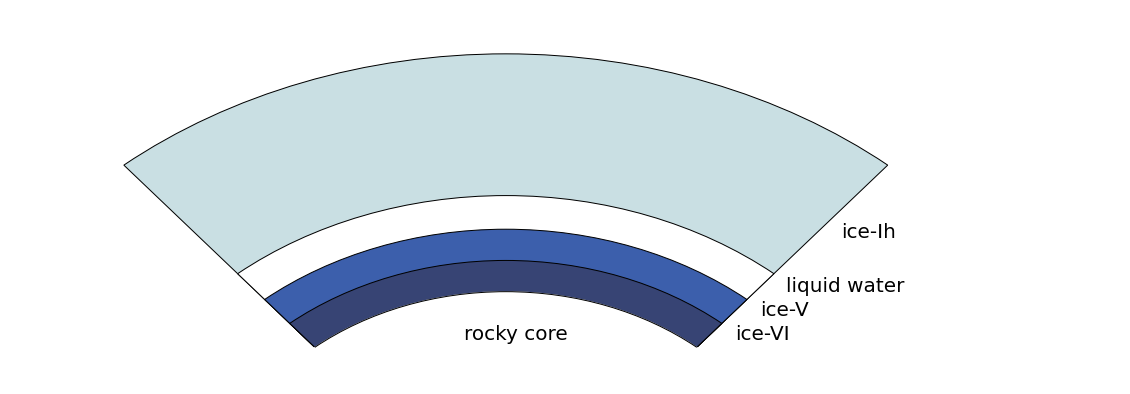

In [8]:
import plotting
import matplotlib.pyplot as plt 
profile = np.loadtxt('zprofile20_e.out')
profile = profile[10]

fig = plt.figure(figsize=(20, 7))
plotting.plot_wedge(plt.gca(), profile, extent=40)